##### we are  taking a COVID-19 data set and understanding how the disease has spread across different countries. We will perform some data manipulation and data visualization operations on top of the data set. We will also be implementing linear regression algorithm to understand the number of active and recovered cases 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("covid.csv")

In [3]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
df.shape

(20128, 32)

In [5]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [6]:
df['location'].value_counts()

Singapore         149
Switzerland       149
Austria           149
Belgium           149
United States     149
                 ... 
Yemen              48
Western Sahara     32
Tajikistan         27
Comoros            26
Lesotho            13
Name: location, Length: 212, dtype: int64

In [7]:
df.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

In [8]:
df.isnull().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14841
new_tests                          15429
total_tests_per_thousand           14841
new_tests_per_thousand             15429
new_tests_smoothed                 14343
new_tests_smoothed_per_thousand    14343
tests_units                        13744
stringency_index                    4395
population                            64
population_density                   886
median_age                          1815
aged_65_older                       2061
aged_70_older                       1907
gdp_per_capita  

In [9]:
df.describe(include="O")

,iso_code,location,date,tests_units
count,20064,20128,20128,6384
unique,211,212,149,5
top,AUS,Singapore,2020-05-17,tests performed
freq,149,149,211,2520


In [10]:
india_case = df[df['location']== 'India']

In [11]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8650,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8651,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8652,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8653,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8654,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [12]:
india_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8793,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8794,IND,India,2020-05-24,131868,6767,3867,147,95.556,4.904,2.802,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8795,IND,India,2020-05-25,138845,6977,4021,154,100.612,5.056,2.914,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8796,IND,India,2020-05-26,145380,6535,4167,146,105.347,4.735,3.020,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8797,IND,India,2020-05-27,151767,6387,4337,170,109.976,4.628,3.143,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [13]:
india_case.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
total_cases,1.000000e+00,9.874728e-01,9.982341e-01,9.359614e-01,1.000000e+00,9.874689e-01,9.982338e-01,9.362617e-01,9.976379e-01,9.225167e-01,...,1.072558e-15,3.593911e-16,NaN,1.557362e-15,3.593911e-16,1.315628e-15,1.315628e-15,-1.072558e-15,-3.593911e-16,1.315628e-15
new_cases,9.874728e-01,1.000000e+00,9.903802e-01,9.635235e-01,9.874728e-01,1.000000e+00,9.903778e-01,9.637504e-01,9.869935e-01,9.293293e-01,...,7.691846e-16,1.191890e-15,NaN,2.217469e-16,1.191890e-15,7.602751e-16,7.602751e-16,-7.691846e-16,-1.191890e-15,7.602751e-16
total_deaths,9.982341e-01,9.903802e-01,1.000000e+00,9.478269e-01,9.982341e-01,9.903775e-01,1.000000e+00,9.480712e-01,9.998264e-01,9.394665e-01,...,1.281466e-15,-3.677751e-17,NaN,-4.290709e-16,-3.677751e-17,-5.188256e-16,-5.188256e-16,-1.281466e-15,3.677751e-17,-5.188256e-16
new_deaths,9.359614e-01,9.635235e-01,9.478269e-01,1.000000e+00,9.359614e-01,9.635212e-01,9.478236e-01,9.999827e-01,9.171346e-01,9.334598e-01,...,3.367281e-16,8.947348e-16,NaN,-9.700977e-16,8.947348e-16,1.431667e-15,1.431667e-15,-3.367281e-16,-8.947348e-16,1.431667e-15
total_cases_per_million,1.000000e+00,9.874728e-01,9.982341e-01,9.359614e-01,1.000000e+00,9.874688e-01,9.982338e-01,9.362617e-01,9.976378e-01,9.225164e-01,...,1.740586e-16,3.602257e-16,NaN,-3.380269e-16,3.602257e-16,1.081109e-16,1.081109e-16,-1.740586e-16,-3.602257e-16,1.081109e-16
new_cases_per_million,9.874689e-01,1.000000e+00,9.903775e-01,9.635212e-01,9.874688e-01,1.000000e+00,9.903751e-01,9.637483e-01,9.869907e-01,9.293223e-01,...,7.003913e-17,-3.324524e-16,NaN,7.159556e-17,-3.324524e-16,4.269052e-17,4.269052e-17,-7.003913e-17,3.324524e-16,4.269052e-17
total_deaths_per_million,9.982338e-01,9.903778e-01,1.000000e+00,9.478236e-01,9.982338e-01,9.903751e-01,1.000000e+00,9.480676e-01,9.998270e-01,9.394695e-01,...,-3.484795e-16,2.075389e-16,NaN,1.084158e-16,2.075389e-16,2.124065e-16,2.124065e-16,3.484795e-16,-2.075389e-16,2.124065e-16
new_deaths_per_million,9.362617e-01,9.637504e-01,9.480712e-01,9.999827e-01,9.362617e-01,9.637483e-01,9.480676e-01,1.000000e+00,9.175767e-01,9.333999e-01,...,3.782805e-17,7.349450e-17,NaN,-3.746778e-16,7.349450e-17,4.292326e-16,4.292326e-16,-3.782805e-17,-7.349450e-17,4.292326e-16
total_tests,9.976379e-01,9.869935e-01,9.998264e-01,9.171346e-01,9.976378e-01,9.869907e-01,9.998270e-01,9.175767e-01,1.000000e+00,9.409116e-01,...,2.167617e-16,6.358344e-16,NaN,-2.136651e-16,-2.167617e-16,2.167617e-16,-6.358344e-16,-5.771281e-16,-6.358344e-16,5.771281e-16
new_tests,9.225167e-01,9.293293e-01,9.394665e-01,9.334598e-01,9.225164e-01,9.293223e-01,9.394695e-01,9.333999e-01,9.409116e-01,1.000000e+00,...,7.538978e-16,0.000000e+00,NaN,5.839716e-16,-7.538978e-16,-5.839716e-16,-7.538978e-16,NaN,-7.538978e-16,5.839716e-16


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

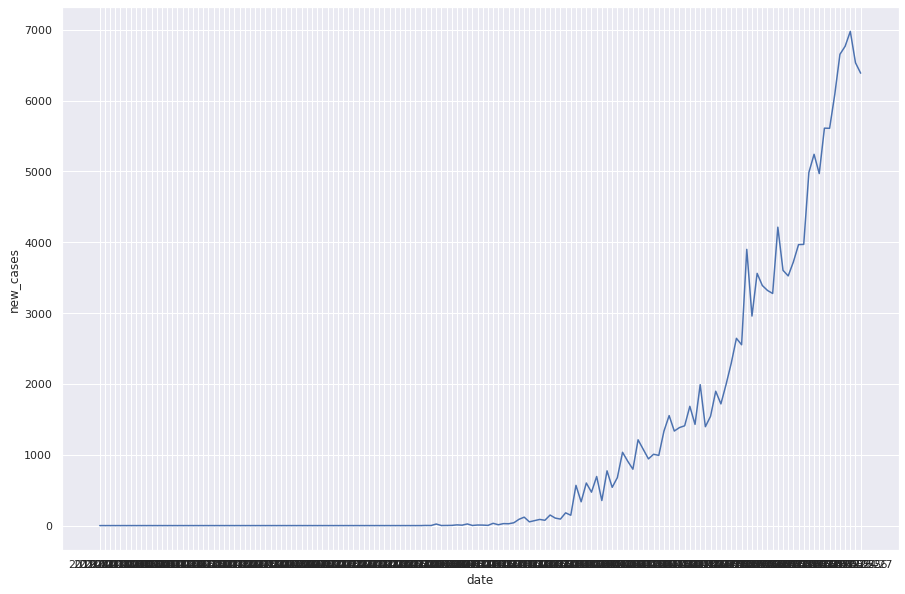

In [15]:
#total case per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='new_cases',data=india_case)
plt.show()

In [16]:
#Making a dataframe for last 5 days
india_last = india_case.tail()

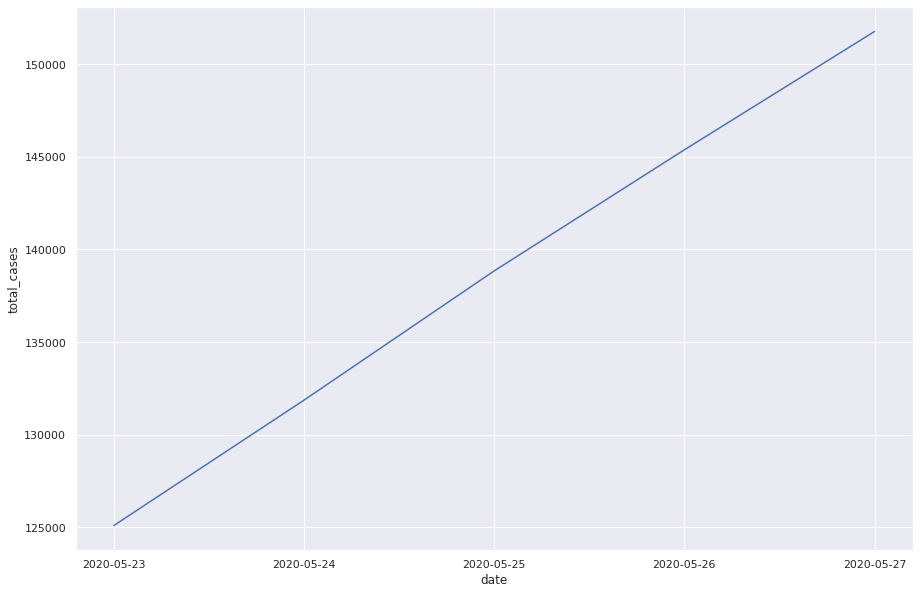

In [17]:
#total case for last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='total_cases',data=india_last)
plt.show()

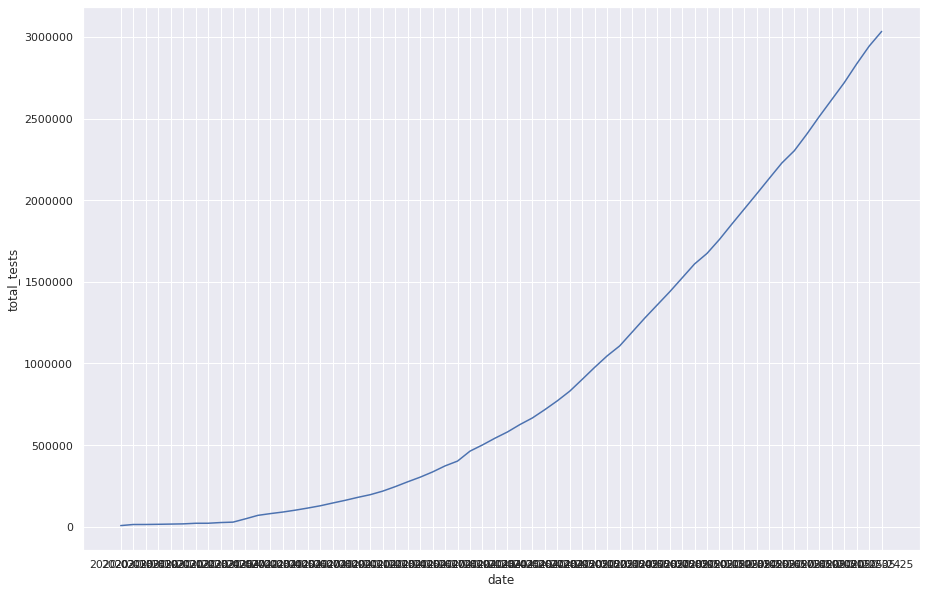

In [18]:
#total test for day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date', y='total_tests',data=india_case)
plt.show()

##### so as we can see from the above graph our Doctors and Government are doing great job because there are 30 lakhs tests has been done till now

In [19]:
countries = df[(df['location']== 'China') | (df['location']== 'India') | (df['location']== 'Japan')]

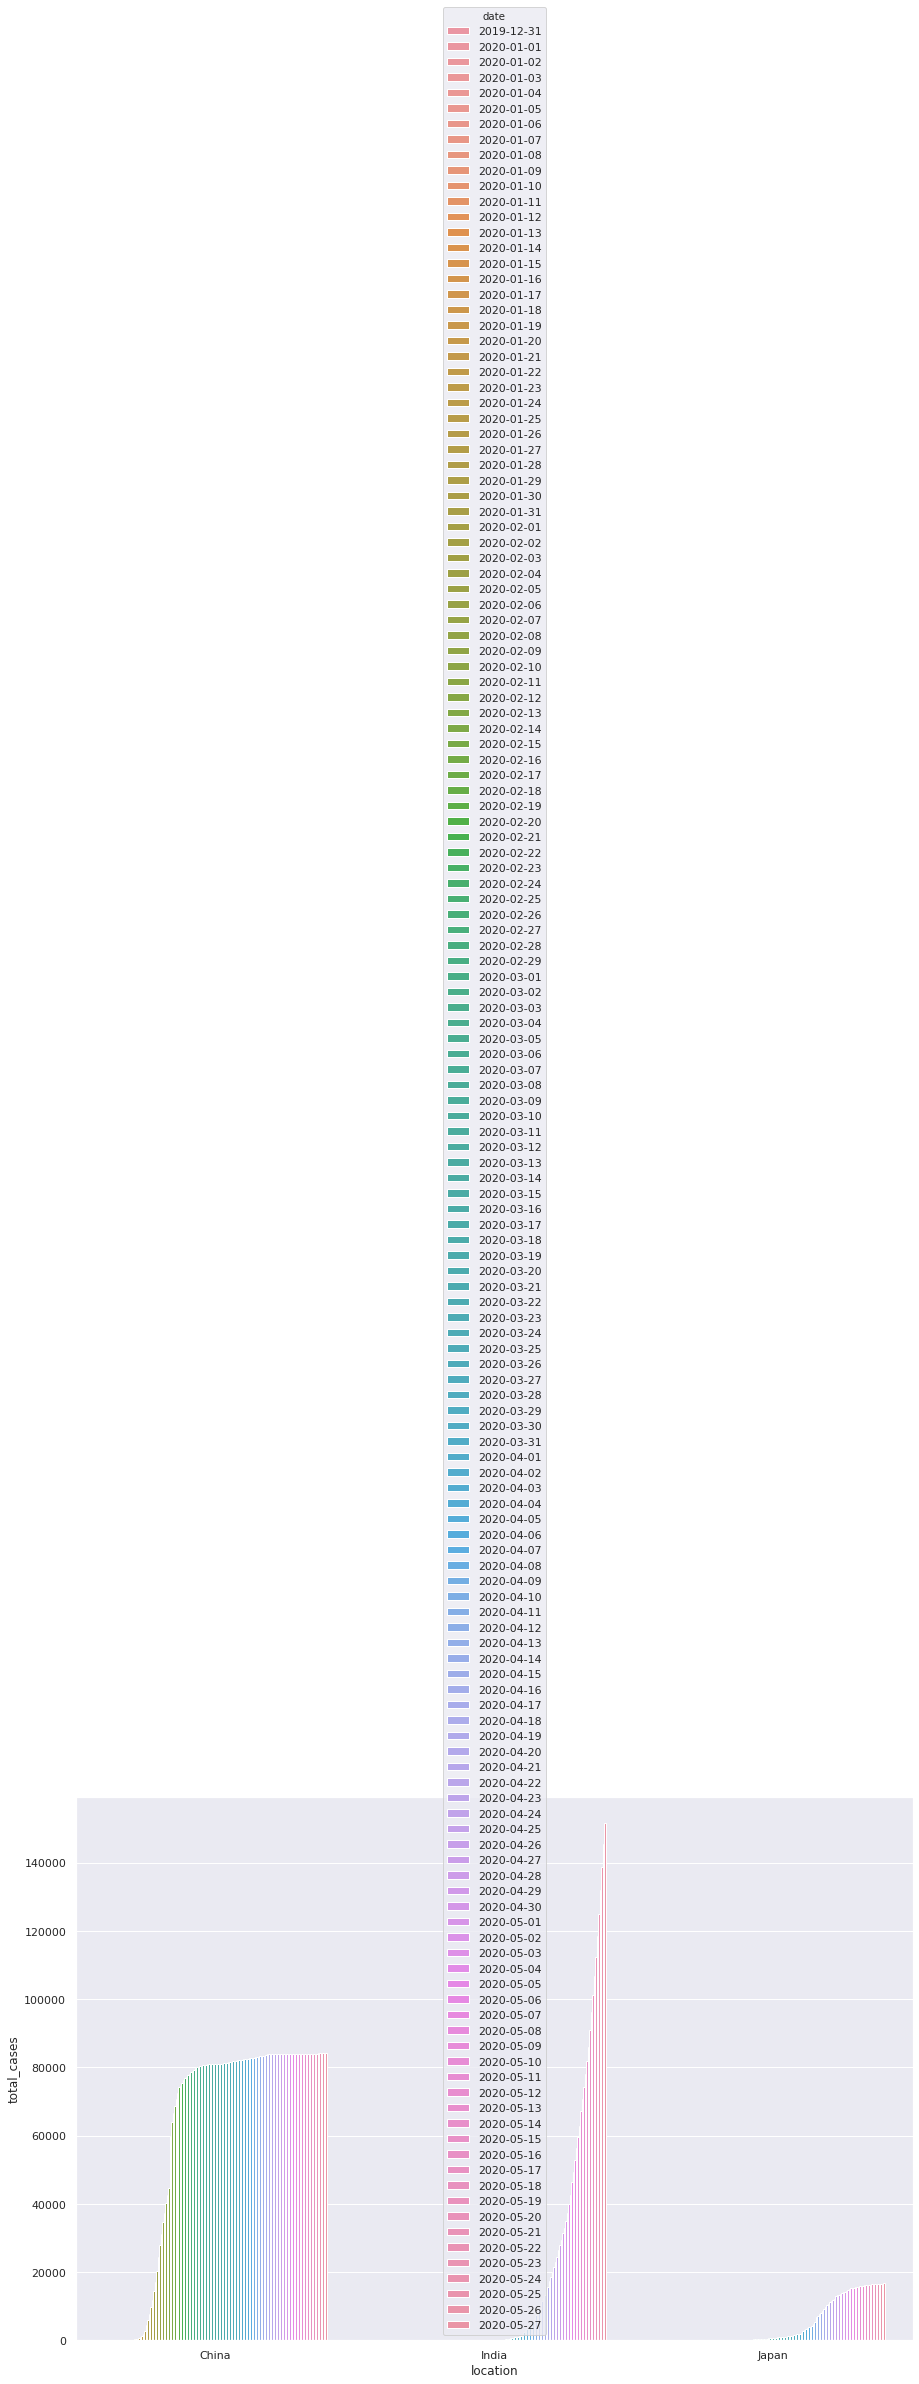

In [20]:
#total case per day
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='location', y='total_cases',data=countries,hue='date')
plt.show()

In [21]:
#last day cases
last_day_cases = df[df['date']== '2020-05-27']
last_day_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
65,ABW,Aruba,2020-05-27,101,0,3,0,945.994,0.000,28.099,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
204,AFG,Afghanistan,2020-05-27,11831,658,220,1,303.917,16.903,5.651,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
271,AGO,Angola,2020-05-27,71,2,4,0,2.160,0.061,0.122,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
333,AIA,Anguilla,2020-05-27,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,ALB,Albania,2020-05-27,1029,25,33,1,357.565,8.687,11.467,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,YEM,Yemen,2020-05-27,249,12,49,4,8.348,0.402,1.643,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19776,ZAF,South Africa,2020-05-27,24264,649,524,43,409.114,10.943,8.835,...,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19846,ZMB,Zambia,2020-05-27,920,0,7,0,50.044,0.000,0.381,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19914,ZWE,Zimbabwe,2020-05-27,56,0,4,0,3.768,0.000,0.269,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [22]:
#sorting data w.r.t to total cases on the last day
sorting = last_day_cases.sort_values(by='total_cases',ascending=False)
sorting

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
20063,OWID_WRL,World,2020-05-27,5555708,95350,350212,3935,712.746,12.233,44.929,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18983,USA,United States,2020-05-27,1681212,18910,98916,696,5079.150,57.129,298.837,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
2739,BRA,Brazil,2020-05-27,391222,16324,24512,1039,1840.530,76.797,115.318,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
16056,RUS,Russia,2020-05-27,362342,8915,3807,174,2482.909,61.089,26.087,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
6809,GBR,United Kingdom,2020-05-27,265227,4043,37048,134,3906.947,59.556,545.738,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19331,VGB,British Virgin Islands,2020-05-27,8,0,1,0,264.577,0.000,33.072,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
1696,BES,Bonaire Sint Eustatius and Saba,2020-05-27,7,0,0,0,266.962,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5723,ESH,Western Sahara,2020-05-27,6,0,0,0,10.045,0.000,0.000,...,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,AIA,Anguilla,2020-05-27,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Top 5 countries with maximum cases
sorting[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18983,USA,United States,2020-05-27,1681212,18910,98916,696,5079.150,57.129,298.837,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2739,BRA,Brazil,2020-05-27,391222,16324,24512,1039,1840.530,76.797,115.318,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
16056,RUS,Russia,2020-05-27,362342,8915,3807,174,2482.909,61.089,26.087,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
6809,GBR,United Kingdom,2020-05-27,265227,4043,37048,134,3906.947,59.556,545.738,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
9688,ITA,Italy,2020-05-27,230555,397,32955,78,3813.232,6.566,545.055,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18


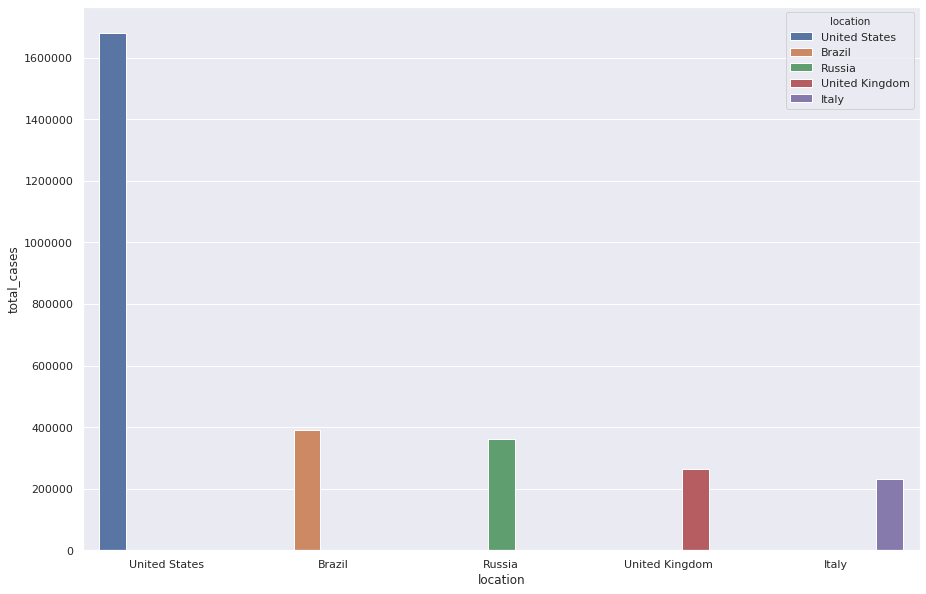

In [24]:
sns.barplot(x='location', y='total_cases',data=sorting[1:6],hue='location')
plt.show()

In [25]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8650,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8651,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8652,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8653,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8654,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [26]:
#Linear Regression
from sklearn.model_selection import train_test_split

In [27]:
#Converting String date to date-time
import datetime as dt
india_case['date'] = pd.to_datetime(india_case['date'])
india_case.head()

/home/shreemay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8650,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8651,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8652,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8653,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8654,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [28]:
#Converting date-time to ordinal
india_case['date'] = india_case['date'].map(dt.datetime.toordinal)
india_case.tail()

/home/shreemay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8793,IND,India,737568,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8794,IND,India,737569,131868,6767,3867,147,95.556,4.904,2.802,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8795,IND,India,737570,138845,6977,4021,154,100.612,5.056,2.914,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8796,IND,India,737571,145380,6535,4167,146,105.347,4.735,3.020,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8797,IND,India,737572,151767,6387,4337,170,109.976,4.628,3.143,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [61]:
date = StandardScaler()
date.fit(pd.DataFrame(india_case[['date']]))
india_case[['date']] = ticket_scaler.transform(india_case[['date']])

/home/shreemay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shreemay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
#Getting Dependant and Independant variables
x = india_case['date']
y = india_case['total_cases']

In [63]:
x.tail()

8793   -17089.588262
8794   -17089.587725
8795   -17089.587188
8796   -17089.586651
8797   -17089.586114
Name: date, dtype: float64

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [65]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred=lr.predict(np.array(x_test).reshape(-1, 1))

In [76]:
y_pred

array([[ -3969.23522186],
       [ -9804.69307327],
       [-17390.78828049],
       [   699.13105774],
       [ 21706.77931976],
       [ 25208.05403137],
       [ 10035.86362076],
       [ 23457.41667938],
       [ 52051.16014862],
       [ 54385.34328842],
       [-13889.51356888],
       [-23809.79191589],
       [-16807.24249268],
       [ -1635.05208206],
       [ 27542.23717117],
       [ -6303.41836166],
       [ 57886.61799622],
       [ 11786.50097656],
       [ 29876.42031479],
       [ 53801.79750061],
       [  5367.49733734],
       [ 37462.51551819],
       [ 58470.16378403],
       [ 42714.4275856 ],
       [  8868.77204895],
       [ 14120.68411636],
       [  1282.67684174],
       [   115.58527374],
       [ 40380.2444458 ],
       [ 16454.86725616],
       [ 56135.98064423],
       [ 26958.69138718],
       [ 34544.78659439],
       [  3033.31419754],
       [ 22290.32510757],
       [  4200.40576935],
       [ 54968.88907242],
       [ 43881.51915359],
       [ 316

In [77]:
from sklearn.metrics import classification_report,mean_squared_error

In [84]:
mean_squared_error(y_test,y_pred)

441281107.9972753

In [83]:
lr.predict(np.array([[1.713977]]))

array([[1.85741142e+10]])

In [86]:
lr.score(np.array(x_test).reshape(-1, 1), np.array(y_test).reshape(-1, 1))

0.5640842077500139